Processing drug network with 11 phases using centrality measures

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import networkx as nx
from tabulate import tabulate

In [2]:
directory = '/Volumes/My Passport for Mac/IDS/pset2/problem_set_2_data_and_materials/CAVIAR'

In [3]:
phases = []
for filename in os.listdir(directory):
    data = pd.read_csv(os.path.join(directory, filename))
    phases.append((filename, data.to_numpy()))

In [4]:
phase_nums = []
for i in phases:
    phase = ''
    for j in i[0]:
        if j.isdigit():
            phase += j
    phase_nums.append(int(phase))

In [13]:
#return ids, graph for phase n
def get_phase(n):
    phase = phases[phase_nums.index(n)][1]
    return phase[:, 0], phase[:, 1:]

In [46]:
# View communication involving a specific person (with id_num)
id_num = 12
for i in range(1, 12):
    l, p = get_phase(i)
    n = -1
    for j in range(l.shape[0]):
        if l[j] == id_num:
            n = j
    phase_und = p.T + p
    degrees = np.sum(phase_und, axis = 0)
    if n != -1:
        print(phase_und[n, :])

[6 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
[31  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0]
[30  0  0  0  0  0  0  0  4  0  4  0  0  1  0  0  0  0  0  5  0  0  1  0
  0  1  0  0  2  0  0  2  0]
[80  0  0  0  0  0  0  5  1  0  0  0  0  1  0  0  6  0  0  0  0  0  0  0
  0  0  0  7  3  0  0  0  0]
[27  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  0  0  0  0  0  4  5
  0  0  0  0  0  0  0  0]
[91  0  1  0  3  1  2  0  2 12  3  0  0  0  0 49  1  0  0  0  0  1  0  3
  1  0  1]
[88  0  4  0  0  1  4  0 12  1  0  0  0  0  0  0  0  0  0  0  1  0  2  2
  0  0  3  0  0  0  0  0  0  0  0  0]
[82  0  0  0 11  1  1  0  6  1  0  2  0  1  0  0  0  2  0  0  0  1  0  0
  0  4  0  3  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
[ 1  1  0  0  0 22  1  1  1  0 12  4  0  0  2  0  0  0  2  0 42  0  0  0
  0  0  0  0  0  0  0  0  0  0]
[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [15]:
#returns degrees, betweenness, eigen for a given phase
def get_cents(phase):
    phase_und = phase.T + phase
    length = phase_und.shape[0]
    degrees = np.sum(phase_und, axis = 0)
    
    netx_graph = nx.from_numpy_matrix(phase1_und)
    
    between_cent = nx.betweenness_centrality(netx_graph)
    between = np.zeros((length,))
    for i in between_cent:
        between[i] = between_cent[i]

    eigen_cent = nx.eigenvector_centrality(netx_graph)
    eigen = np.zeros((length,))
    for i in eigen_cent:
        eigen[i] = eigen_cent[i]
    return degrees, between, eigen

In [16]:
# List of the important players in the network
important = [1, 3, 83, 86, 85, 6, 11, 88, 106, 89, 84, 5, 8, 76, 77, 87, 82, 96, 12, 17, 80, 33, 16]

23


In [17]:
# Calculate degree, and betweenness and eigenvector centralities for the important players
important_traits = []
for j in range(1, 12):
    phase_traits = [[] for i in range(len(important))]
    labels, phase = get_phase(j)
    degrees, between, eigen = get_cents(phase)
    for i in range(labels.shape[0]):
        if labels[i] in important:
            ind = important.index(labels[i])
            phase_traits[ind] = ([degrees[i], between[i], eigen[i]])
    important_traits.append(phase_traits)

In [18]:
for i in important_traits:
    print(i[0], '\n')

[35, 0.9065934065934067, 0.6264507675831664] 

[109, 0.9065934065934067, 0.6264507675831664] 

[217, 0.9065934065934067, 0.6264507675831664] 

[329, 0.9065934065934067, 0.6264507675831664] 

[125, 0.9065934065934067, 0.6264507675831664] 

[453, 0.9065934065934067, 0.6264507675831664] 

[291, 0.9065934065934067, 0.6264507675831664] 

[183, 0.9065934065934067, 0.6264507675831664] 

[95, 0.9065934065934067, 0.6264507675831664] 

[118, 0.9065934065934067, 0.6264507675831664] 

[37, 0.9065934065934067, 0.6264507675831664] 



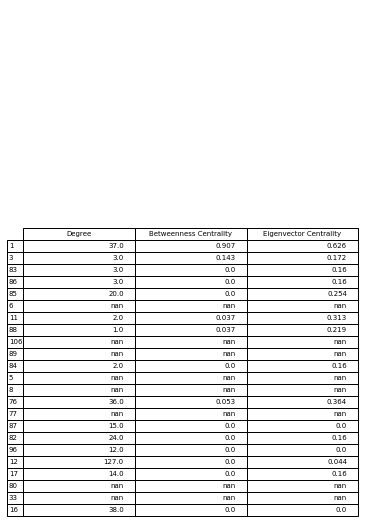

In [19]:
# Create tables of the values
data = []
for i in important_traits[10]:
    a = []
    for j in i:
        try:
            a.append(round(1000 * j) / 1000)
        except:
            a.append(-1)
    data.append(a)
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
pd.plotting.table(ax, pd.DataFrame(data), rowLabels=important, colLabels = ['Degree', 'Betweenness Centrality', 'Eigenvector Centrality'])  # where df is your data frame


In [20]:
# Average centrality measures over time
avg_deg = [0 for i in range(23)]
avg_bet = [0 for i in range(23)]
avg_eig = [0 for i in range(23)]
for i in important_traits:
    for j in range(len(i)):
        try:
            avg_deg[j] += i[j][0]
            avg_bet[j] += i[j][1]
            avg_eig[j] += i[j][2]
        except:
            pass
avg_deg = [i / 11 for i in avg_deg]
avg_bet = [i / 11 for i in avg_bet]
avg_eig = [i / 11 for i in avg_eig]

In [21]:
print(avg_deg, '\n')
print(avg_bet, '\n')
print(avg_eig)

[181.0909090909091, 67.54545454545455, 15.909090909090908, 7.909090909090909, 26.181818181818183, 7.454545454545454, 14.0, 3.8181818181818183, 0.18181818181818182, 5.0, 3.727272727272727, 11.0, 8.454545454545455, 24.636363636363637, 4.454545454545454, 26.09090909090909, 16.545454545454547, 3.090909090909091, 51.0, 6.363636363636363, 0.09090909090909091, 0.09090909090909091, 11.818181818181818] 

[0.9065934065934068, 0.03296703296703297, 0.09124209124209126, 0.0, 0.01964701964701965, 0.008658008658008658, 0.004329004329004329, 0.021145521145521148, 0.0, 0.05194805194805196, 0.000999000999000999, 0.0, 0.005827505827505828, 0.00815850815850816, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

[0.6264507675831663, 0.22754354771437296, 0.18802194407932069, 0.09153543114192489, 0.264532060736081, 0.1609587977818627, 0.07847942654248065, 0.20000859955718966, 0.0, 0.09163427049224358, 0.06464415026155122, 0.12758653088418848, 0.16013168868551642, 0.11991211774883054, 0.0, 0.0, 0.0291784954816745

In [22]:
# Sort the centrality measures so that the most central nodes are listed first
def enum_sort(n, num = None, ret = False):
    enum_n = list(enumerate(n))
    enum_n.sort(key=lambda x:x[1], reverse = True)
    if num == None:
        print(enum_n)
    else:
        print(enum_n[:num])
    if ret:
        return enum_n

In [24]:
enum_sort(avg_deg)
print('\n')
enum_sort(avg_bet)
print('\n')
enum_sort(avg_eig)
print(important[0], important[1], important[4])

[(0, 181.0909090909091), (1, 67.54545454545455), (18, 51.0), (4, 26.181818181818183), (15, 26.09090909090909), (13, 24.636363636363637), (16, 16.545454545454547), (2, 15.909090909090908), (6, 14.0), (22, 11.818181818181818), (11, 11.0), (12, 8.454545454545455), (3, 7.909090909090909), (5, 7.454545454545454), (19, 6.363636363636363), (9, 5.0), (14, 4.454545454545454), (7, 3.8181818181818183), (10, 3.727272727272727), (17, 3.090909090909091), (8, 0.18181818181818182), (20, 0.09090909090909091), (21, 0.09090909090909091)]


[(0, 0.9065934065934068), (2, 0.09124209124209126), (9, 0.05194805194805196), (1, 0.03296703296703297), (7, 0.021145521145521148), (4, 0.01964701964701965), (5, 0.008658008658008658), (13, 0.00815850815850816), (12, 0.005827505827505828), (6, 0.004329004329004329), (10, 0.000999000999000999), (3, 0.0), (8, 0.0), (11, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0)]


[(0, 0.6264507675831663), (4, 0.264532060736081

In [25]:
# Calculate degree, betweenness centrality, and eigenvector centrality for all nodes
all_traits = []
for j in range(1, 12):
    phase_traits = [[] for i in range(110)]
    labels, phase = get_phase(j)
    degrees, between, eigen = get_cents(phase)
    for i in range(labels.shape[0]):
        phase_traits[labels[i] - 1] = ([degrees[i], between[i], eigen[i]])
    all_traits.append(phase_traits)

In [58]:
# Find the average values for each person over the 11 phases
avg_deg = [0 for i in range(110)]
avg_bet = [0 for i in range(110)]
avg_eig = [0 for i in range(110)]
for i in all_traits:
    for j in range(len(i)):
        try:
            avg_deg[j] += i[j][0]
            avg_bet[j] += i[j][1]
            avg_eig[j] += i[j][2]
        except:
            pass
avg_deg = [i / 11 for i in avg_deg]
avg_bet = [i / 11 for i in avg_bet]
avg_eig = [i / 11 for i in avg_eig]

In [59]:
deg_sort = enum_sort(avg_deg, 20, True)
print('\n')
bet_sort = enum_sort(avg_bet, 20, True)
print('\n')
eig_sort = enum_sort(avg_eig, 20, True)

[(0, 181.0909090909091), (2, 67.54545454545455), (11, 51.0), (84, 26.181818181818183), (86, 26.09090909090909), (75, 24.636363636363637), (36, 19.727272727272727), (13, 17.0), (81, 16.545454545454547), (82, 15.909090909090908), (10, 14.0), (15, 11.818181818181818), (18, 11.545454545454545), (4, 11.0), (40, 10.272727272727273), (7, 8.454545454545455), (1, 8.181818181818182), (8, 8.181818181818182), (85, 7.909090909090909), (5, 7.454545454545454)]


[(0, 0.9065934065934068), (82, 0.09124209124209126), (88, 0.05194805194805196), (2, 0.03296703296703297), (87, 0.021145521145521148), (84, 0.01964701964701965), (1, 0.01298701298701299), (5, 0.008658008658008658), (75, 0.00815850815850816), (89, 0.00815850815850816), (7, 0.005827505827505828), (47, 0.00482850482850483), (10, 0.004329004329004329), (61, 0.00333000333000333), (17, 0.001998001998001998), (6, 0.000999000999000999), (34, 0.000999000999000999), (54, 0.000999000999000999), (63, 0.000999000999000999), (83, 0.000999000999000999)]


[(

In [29]:
# pring the most important non-important characters
x = 0
count = 1
important_set = {1, 3, 83, 86, 85, 6, 11, 88, 106, 89, 84, 5, 8, 76, 77, 87, 82, 96, 12, 17, 80, 33, 16}

for i in bet_sort:
    if (i[0] + 1) not in important_set:
        print(i)
        x += 1
        print(count, '\n')
    count += 1
    if x > 3:
        break

(1, 0.01298701298701299)
7 

(89, 0.00815850815850816)
10 

(47, 0.00482850482850483)
12 

(61, 0.00333000333000333)
14 



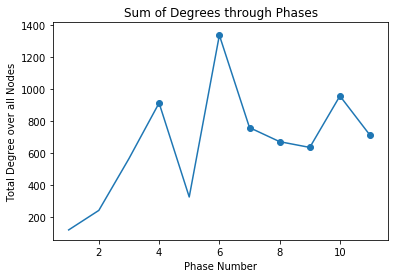

In [30]:
# Plot of degree over the phases
deg_time = []
for i in all_traits:
    total_deg = 0
    for j in range(len(i)):
        try:
            total_deg += i[j][0]
        except:
            pass
    deg_time.append(total_deg)
plt.plot(list(range(1, 12)), deg_time)
plt.title('Sum of Degrees through Phases')
plt.xlabel('Phase Number')
plt.ylabel('Total Degree over all Nodes')
pts = [4, 6, 7, 8, 9, 10, 11]
pts_y = [deg_time[i - 1] for i in pts]
plt.scatter(pts, pts_y)

In [64]:
# Plot of the boss (id = 1) over time
bbet = []
beig = []
bdeg = []
for i in all_traits:
    try:
        bdeg.append(i[0][0])
        bbet.append(i[0][1])
        beig.append(i[0][2])
    except:
        bdeg.append(0)
        bbet.append(0)
        beig.append(0)
for i in range(len(deg_time)):
    bdeg[i] /= deg_time[i];
    

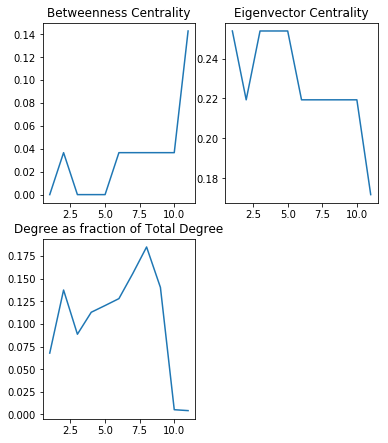

In [65]:
plt.subplot(221)
plt.title("Betweenness Centrality")
plt.plot(list(range(1, 12)), bbet)
plt.subplot(222)
plt.title("Eigenvector Centrality")
plt.plot(list(range(1, 12)), beig)
plt.subplot(223)
plt.subplots_adjust(top = 1.5)
plt.title("Degree as fraction of Total Degree")
plt.plot(list(range(1, 12)), bdeg)


In [ ]:
for i in range(1, 12):
    p = get_phase(i)
    phase_und = p[1].T + p[1]
    netx_graph = nx.from_numpy_matrix(phase_und)
    plt.figure(figsize=(7,7))
    plt.subplot(23 * 10 + i - 6)
    nx.draw(netx_graph)
plt.show()